This notebook replicates figures from Gao et al., 2018.

In [7]:
import datajoint as dj
from pipeline import ephys, behavior, subject, acquisition
import numpy as np
import matplotlib.pyplot as plt
from pipeline import get_spk_counts, get_trials, get_spk_times, get_psth
import scipy.signal as signal
import scipy.stats as ss
import datetime
import numpy.random as random
%matplotlib inline

## Figure 2c

In [8]:
def compute_mean_and_sem(fr):
    mean_fr = np.average(fr, axis=0)
    sem_fr = np.divide(np.std(fr, axis=0), np.sqrt(np.shape(fr)[0]))
    return mean_fr, sem_fr

In [9]:
# restrict to photo activation sessions
sessions = acquisition.Session & (behavior.TrialSetType & 'trial_set_type = "photo activation"')

# restrict to pyramidal cells, no light trials, only hit trials, trial number > 15
valid_psth = (ephys.AlignedPsth & sessions & 
           (ephys.UnitSpikeTimes & 'unit_cell_type = "pyramidal"') &
           'photo_stim_id = "0"' & 
           'trial_condition = "Hit"' &
           'l_trial_number > 15' &
           'r_trial_number > 15').proj(selectivity = 'sample_selectivity + delay_selectivity + response_selectivity')

# restrict to selective units
fr_diff, bins = (ephys.AlignedPsth & (valid_psth & 'selectivity > 0')).fetch(
    'psth_diff', 'bins')
fr_diff = np.array(fr_diff.tolist())


In [11]:
mean_fr, sem_fr = compute_mean_and_sem(fr_diff)

In [12]:
xlim = [-3, 2]
ylim = [-1, 4]
time_points = [-2.6, -1.3, 0]

Text(0, 0.5, 'Selectivity (spks/s)')

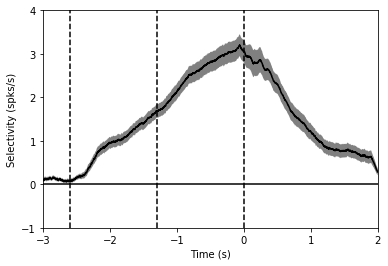

In [13]:

fig, ax = plt.subplots(1, 1, sharex=True)
for time_point in time_points:
    ax.axvline(x=time_point, color='black', linestyle='dashed')
ax.axhline(y=0, color='black')
ax.fill_between(bins[0], mean_fr+sem_fr, mean_fr-sem_fr, facecolor="gray")
ax.plot(bins[0], mean_fr, color="black")
ax.set_xlim(xlim[0], xlim[1])
ax.set_ylim(ylim[0], ylim[1])
ax.set_xlabel('Time (s)')
ax.set_ylabel('Selectivity (spks/s)')

## Figure 3f

In [14]:
# restrict to photo inhibition sessions
sessions = acquisition.Session & (behavior.TrialSetType & 'trial_set_type = "photo inhibition"')

# light off condition
light_off = (ephys.AlignedPsth & sessions & 
              (ephys.UnitSpikeTimes & 'unit_cell_type = "pyramidal"') &
              'photo_stim_id = "0"' & 
              'trial_condition = "All"' &
              'l_trial_number > 5' &
              'r_trial_number > 5').proj(
    selectivity = 'sample_selectivity + delay_selectivity + response_selectivity')

# restrict to selective units
fr_diff_off, bins = (ephys.AlignedPsth & (light_off & 'selectivity > 0')).fetch(
    'psth_diff', 'bins')
fr_diff_off = np.array(fr_diff_off.tolist())

# light on condition
light_on = (ephys.AlignedPsth & sessions & 
              (ephys.UnitSpikeTimes & 'unit_cell_type = "pyramidal"') &
              'photo_stim_id = "6"' & 
              'trial_condition = "All"' &
              'l_trial_number > 5' &
              'r_trial_number > 5').proj(
    selectivity = 'sample_selectivity + delay_selectivity + response_selectivity')

fr_diff_on = (ephys.AlignedPsth & (light_on & 'selectivity > 0')).fetch(
    'psth_diff')
fr_diff_on = np.array(fr_diff_on.tolist())

In [15]:
mean_fr_off, sem_fr_off = compute_mean_and_sem(fr_diff_off)
mean_fr_on, sem_fr_on = compute_mean_and_sem(fr_diff_on)

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:356: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [16]:
mean_fr = [mean_fr_off, mean_fr_on]
sem_fr = [sem_fr_off, sem_fr_on]

ValueError: x and y must have same first dimension, but have shapes (5501,) and (1,)

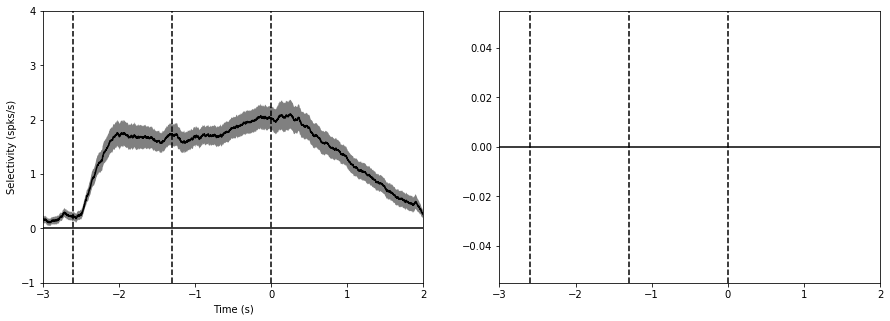

In [17]:
ylim = [-1, 3]
fig, axs = plt.subplots(1, 2, sharex=True, figsize=(15,5))
for ix, ax in enumerate(axs):
    for time_point in time_points:
        ax.axvline(x=time_point, color='black', linestyle='dashed')
    ax.axhline(y=0, color='black')
    ax.fill_between(bins[0], mean_fr[ix]+sem_fr[ix], mean_fr[ix]-sem_fr[ix], facecolor="gray")
    ax.plot(bins[0], mean_fr[ix], color="black")
    ax.set_xlim(xlim[0], xlim[1])
    ax.set_ylim(ylim[0], ylim[1])
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Selectivity (spks/s)')

In [18]:
mean_fr_on

nan

In [19]:
light_on = (ephys.AlignedPsth & sessions & 
              (ephys.UnitSpikeTimes & 'unit_cell_type = "pyramidal"') &
              'photo_stim_id = "6"' & 
              'trial_condition = "All"' &
              'l_trial_number > 5' &
              'r_trial_number > 5').proj(
    selectivity = 'sample_selectivity + delay_selectivity + response_selectivity')

In [15]:
light_on

subject name of the subject,session_time session time,brain_location,unit_id,photo_stim_id,trial_condition name of this condition,selectivity calculated attribute


In [2]:
ephys.AlignedPsth.populate('photo_stim_id="6"', suppress_errors=True, display_progress=True)

100%|██████████| 3846/3846 [01:01<00:00, 62.26it/s]


[]

In [20]:
behavior.TrialSet.Trial & 'photo_stim_id="6"'

subject name of the subject,session_time session time,trial_id trial number to reference to the trials,"trial_start_time in secs, time referenced to session start","trial_pole_in_time in secs, the start of the sample period for each trial, relative to the trial start","trial_pole_out_time in secs, the end of the sample period and start of the delay period, relative to the trial start","trial_cue_time in secs, the end of the delay period, relative to the start of the trials",trial_response subject response to the stimulus,trial_lick_early whether the animal licks early,photo_stim_id,"trial_start_idx first index for this trial, on the session recording series","trial_end_idx last index for this trial, on the session recording series"
BAYLORCD12,2018-01-25 19:16:01,31,3544.89,0.57,1.87,3.17,HitL,1,6,3000000,3099999
BAYLORCD12,2018-01-25 19:16:01,41,3664.32,0.57,2.524,3.824,HitR,1,6,4000000,4099999
BAYLORCD12,2018-01-25 19:16:01,43,3688.64,0.57,1.87,3.17,HitR,1,6,4200000,4299999
BAYLORCD12,2018-01-25 19:16:01,75,4095.68,0.57,1.87,3.17,HitL,1,6,7400000,7499999
BAYLORCD12,2018-01-25 19:16:01,87,4236.96,0.57,1.87,3.17,HitL,1,6,8600000,8699999
BAYLORCD12,2018-01-25 19:16:01,117,4572.94,0.57,1.87,3.17,ErrL,1,6,11600000,11699999
BAYLORCD12,2018-01-25 19:16:01,133,4751.12,0.57,1.87,3.17,HitR,1,6,13200000,13299999
BAYLORCD12,2018-01-25 19:16:01,135,4771.9,0.57,1.87,3.17,HitL,1,6,13400000,13499999
BAYLORCD12,2018-01-25 19:16:01,137,4791.27,0.57,1.87,3.17,HitR,1,6,13600000,13699999
BAYLORCD12,2018-01-25 19:16:01,139,4815.33,0.57,1.87,3.17,HitL,1,6,13800000,13899999
